In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.models import Sequential, Model, load_model
from keras.utils import plot_model
from keras.layers import *
from keras.callbacks import *
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, adam
from sklearn.metrics import classification_report, confusion_matrix
from keras.applications.densenet import DenseNet121

np.random.seed(3)

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32 # 16->64->32
epochs = 100 # 50->100
root_path = '/home/mywork/kijun_kwon/data_split1'
train_path = root_path +'/train'
val_path = root_path +'/val'
test_path = root_path +'/test'
path_list = [train_path, val_path, test_path]

class_root='/home/mywork/kijun_kwon/data_split1/train'
class_list = [ item for item in os.listdir(class_root) if os.path.isdir(os.path.join(class_root, item)) ]
class_list.sort()

sizesOfSet = [0, 0, 0] # size of training set, validation set, test set
for p in range(len(path_list)) :
    for i in range(len(class_list)):
        sizesOfSet[p] += (len([name for name in os.listdir(path_list[p] + '/'+ class_list[i]) if os.path.isfile(os.path.join(path_list[p]+ '/'+ class_list[i], name))]))

image_height = 224
image_width = 224
channels = 3

In [11]:
model = DenseNet121(include_top=True, weights = None, input_tensor=None, input_shape=(image_height,image_width,channels), pooling=None, classes=len(class_list))

In [12]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        color_mode = "rgb",
        target_size=(image_height, image_width),
        batch_size = batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_path,
        shuffle = False,
        color_mode = "rgb",
        target_size=(image_height, image_width),    
        batch_size=batch_size,
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        val_path,
        color_mode = "rgb",
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 1965 images belonging to 7 classes.
Found 658 images belonging to 7 classes.
Found 655 images belonging to 7 classes.


In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model_checkpoint = ModelCheckpoint(('./densenet.{epoch:02d}.hdf5'),
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=True)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                                         patience=5, verbose=1)

callbacks = [model_checkpoint, reduce_learning_rate]

In [16]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch = sizesOfSet[0] // batch_size,
            epochs=epochs,
            validation_data=val_generator,
            validation_steps= sizesOfSet[1] // batch_size,
            callbacks=callbacks)

Epoch 1/100
61/61 [==============================] - 52s 855ms/step - loss: 0.9821 - acc: 0.6580 - val_loss: 14.3946 - val_acc: 0.1062

Epoch 00001: val_loss improved from inf to 14.39463, saving model to ./densenet.01.hdf5
Epoch 2/100
61/61 [==============================] - 22s 359ms/step - loss: 0.7266 - acc: 0.7324 - val_loss: 7.4558 - val_acc: 0.3483

Epoch 00002: val_loss improved from 14.39463 to 7.45577, saving model to ./densenet.02.hdf5
Epoch 3/100
61/61 [==============================] - 19s 313ms/step - loss: 0.5960 - acc: 0.7770 - val_loss: 5.4899 - val_acc: 0.2777

Epoch 00003: val_loss improved from 7.45577 to 5.48985, saving model to ./densenet.03.hdf5
Epoch 4/100
61/61 [==============================] - 18s 295ms/step - loss: 0.5117 - acc: 0.8208 - val_loss: 3.3230 - val_acc: 0.4302

Epoch 00004: val_loss improved from 5.48985 to 3.32297, saving model to ./densenet.04.hdf5
Epoch 5/100
61/61 [==============================] - 18s 292ms/step - loss: 0.4427 - acc: 0.8348 


Epoch 00040: val_loss did not improve from 0.20907
Epoch 41/100
61/61 [==============================] - 16s 265ms/step - loss: 0.0100 - acc: 0.9990 - val_loss: 0.2023 - val_acc: 0.9502

Epoch 00041: val_loss improved from 0.20907 to 0.20228, saving model to ./densenet.41.hdf5
Epoch 42/100
61/61 [==============================] - 16s 267ms/step - loss: 0.0111 - acc: 0.9980 - val_loss: 0.2447 - val_acc: 0.9422

Epoch 00042: val_loss did not improve from 0.20228
Epoch 43/100
61/61 [==============================] - 16s 270ms/step - loss: 0.0128 - acc: 0.9980 - val_loss: 0.2448 - val_acc: 0.9359

Epoch 00043: val_loss did not improve from 0.20228
Epoch 44/100
61/61 [==============================] - 18s 297ms/step - loss: 0.0082 - acc: 0.9985 - val_loss: 0.2441 - val_acc: 0.9342

Epoch 00044: val_loss did not improve from 0.20228
Epoch 45/100
61/61 [==============================] - 18s 293ms/step - loss: 0.0117 - acc: 0.9980 - val_loss: 0.2490 - val_acc: 0.9406

Epoch 00045: val_loss di

61/61 [==============================] - 17s 277ms/step - loss: 0.0084 - acc: 0.9980 - val_loss: 0.2274 - val_acc: 0.9390

Epoch 00081: val_loss did not improve from 0.15775
Epoch 82/100
61/61 [==============================] - 17s 271ms/step - loss: 0.0123 - acc: 0.9962 - val_loss: 0.2144 - val_acc: 0.9422

Epoch 00082: val_loss did not improve from 0.15775
Epoch 83/100
61/61 [==============================] - 16s 269ms/step - loss: 0.0065 - acc: 0.9990 - val_loss: 0.2503 - val_acc: 0.9342

Epoch 00083: val_loss did not improve from 0.15775

Epoch 00083: ReduceLROnPlateau reducing learning rate to 1.9683000829218145e-08.
Epoch 84/100
61/61 [==============================] - 17s 271ms/step - loss: 0.0059 - acc: 0.9990 - val_loss: 0.2416 - val_acc: 0.9390

Epoch 00084: val_loss did not improve from 0.15775
Epoch 85/100
61/61 [==============================] - 17s 272ms/step - loss: 0.0084 - acc: 0.9985 - val_loss: 0.2391 - val_acc: 0.9391

Epoch 00085: val_loss did not improve from 0.15

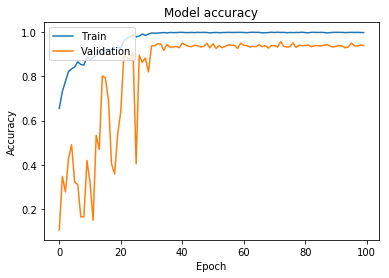

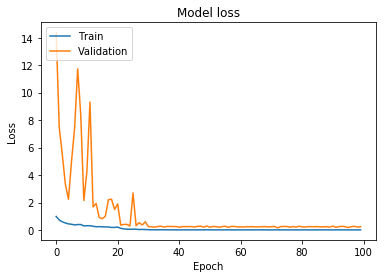

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
Y_pred = model.predict_generator(test_generator, sizesOfSet[2] // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('\tConfusion Matrix')
conf = confusion_matrix(test_generator.classes, y_pred)
print(conf)
print('\n\t\t\tClassification Report')
report = classification_report(test_generator.classes, y_pred, target_names=class_list)
report_dict = classification_report(test_generator.classes, y_pred, target_names=class_list, output_dict = True)
print(report)
print("\n-- Evaluate --")
scores = model.evaluate_generator(test_generator)
under = 1-report_dict['ok']['precision']
over = 1-report_dict['ok']['recall']
print("%s: %.2f\t%s: %.2f%%\n과검율: %.2f%%\t 미검율: %.2f%%"
      %(model.metrics_names[0], scores[0], model.metrics_names[1], scores[1]*100,
        over*100, under*100))

	Confusion Matrix
[[126   0   0   1   0   1   0]
 [  2  60   1   0   0   0  11]
 [  2   2 221   0   0   0   0]
 [  1   0   0  66   0   0   2]
 [  0   3   3   0  11   0   1]
 [  0   0   1   0   0  88   0]
 [  2  13   1   1   5   0  33]]

			Classification Report
               precision    recall  f1-score   support

         dent       0.95      0.98      0.97       128
discoloration       0.77      0.81      0.79        74
           ok       0.97      0.98      0.98       225
        other       0.97      0.96      0.96        69
      scratch       0.69      0.61      0.65        18
         sink       0.99      0.99      0.99        89
    substance       0.70      0.60      0.65        55

    micro avg       0.92      0.92      0.92       658
    macro avg       0.86      0.85      0.85       658
 weighted avg       0.92      0.92      0.92       658


-- Evaluate --
loss: 0.29	acc: 91.95%
과검율: 1.78%	 미검율: 2.64%
